Importamos el data set

In [1]:
import pandas as pd

# Cargar el archivo CSV proporcionado
file_path = 'ML_cars.csv'
data_cars = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para entender su estructura
data_cars.head()


C:\Users\jerom\AppData\Local\Temp\ipykernel_9888\632025367.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA



In [2]:
# Análisis exploratorio inicial

# 1. Resumen de valores nulos por columna
missing_values = data_cars.isnull().sum()

# 2. Resumen estadístico de variables numéricas
stats_summary = data_cars.describe()

# 3. Verificar la cantidad de valores únicos para cada columna categórica
categorical_columns = data_cars.select_dtypes(include='object').columns
unique_values = {col: data_cars[col].nunique() for col in categorical_columns}

# Presentar los resultados iniciales
missing_values, stats_summary, unique_values


(car_ID              0
 symboling           0
 CarName             0
 fueltype            0
 aspiration          0
 doornumber          0
 carbody             0
 drivewheel          0
 enginelocation      0
 wheelbase           0
 carlength           0
 carwidth            0
 carheight           0
 curbweight          0
 enginetype          0
 cylindernumber      0
 enginesize          0
 fuelsystem          0
 boreratio           0
 stroke              0
 compressionratio    0
 horsepower          0
 peakrpm             0
 citympg             0
 highwaympg          0
 price               0
 dtype: int64,
            car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
 count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
 mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
 std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
 min      1.000000   -2.000000   86.600000  141.100000   60

Análisis Exploratorio:
1. Valores Nulos:

El conjunto de datos no contiene valores nulos, lo que facilita el procesamiento sin necesidad de imputación.

2. Variables Numéricas:
Variables como price, enginesize, horsepower, y citympg tienen una amplia dispersión, lo que sugiere la necesidad de normalización o estandarización para modelos sensibles a escalas.
La variable objetivo price tiene un rango de 
5118
5118 a 
45400
45400.

3. Variables Categóricas:

Variables como fueltype, aspiration, y doornumber tienen pocas categorías, lo que simplifica su codificación.
CarName tiene 147 valores únicos, posiblemente redundante como identificador.

- Clasificación:
Dividir price en "baratos" y "caros" usando la mediana como punto de corte.
Preparar los datos, codificar variables categóricas y normalizar variables numéricas.
- Regresión:
Predecir el precio con todas las características relevantes.

La preparación de los datos para clasificación se ha completado:
Conjuntos creados:
    - Características (X): 44 variables después de codificar y normalizar las categóricas y numéricas.
    - Variable objetivo (y): Indicador binario de si el precio es "barato" (0) o "caro" (1).
    - División: 80% para entrenamiento y 20% para prueba.

In [3]:
# Paso 1: Crear la variable objetivo para clasificación
median_price = data_cars['price'].median()
data_cars['price_category'] = data_cars['price'].apply(lambda x: 1 if x > median_price else 0)

# Paso 2: Separar las características y la variable objetivo
X = data_cars.drop(columns=['price', 'price_category', 'CarName'])  # Excluir 'price' y 'CarName'
y = data_cars['price_category']

# Paso 3: Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Paso 4: Normalizar las variables numéricas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Paso 5: Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Verificar dimensiones de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((164, 44), (41, 44), (164,), (41,))

- Implementación del modelo de clasificación.

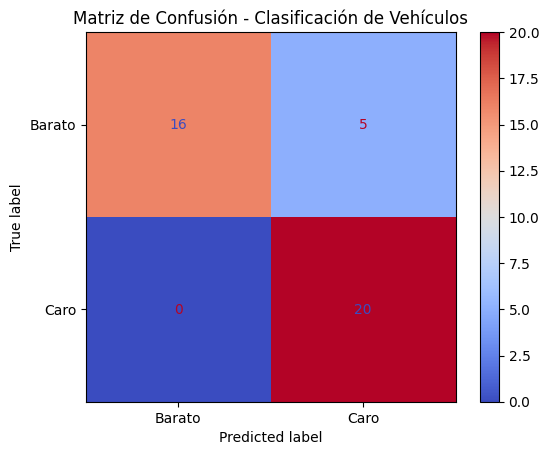

Informe de Clasificación:
              precision    recall  f1-score   support

      Barato       1.00      0.76      0.86        21
        Caro       0.80      1.00      0.89        20

    accuracy                           0.88        41
   macro avg       0.90      0.88      0.88        41
weighted avg       0.90      0.88      0.88        41



In [8]:
# Recalcular el modelo de clasificación de vehículos desde el inicio de la matriz de confusión

# 1. Importar librerías necesarias
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 2. Entrenar el modelo
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

# 3. Realizar predicciones
y_pred = decision_tree.predict(X_test)

# 4. Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# 5. Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Barato", "Caro"])
disp.plot(cmap="coolwarm")
plt.title("Matriz de Confusión - Clasificación de Vehículos")
plt.show()

# 6. Generar el informe de clasificación
report = classification_report(y_test, y_pred, target_names=["Barato", "Caro"])
print("Informe de Clasificación:")
print(report)



- Resultados del Modelo de Clasificación de Vehículos:
1. Matriz de Confusión:
Barato:
16 Verdaderos Positivos.
5 Falsos Negativos.
Caro:
20 Verdaderos Positivos.
0 Falsos Positivos.

2. Informe de Clasificación:

    - Precisión:
        Barato: 100%.
        Caro: 80%.
    - Sensibilidad (Recall):
        Barato: 76%.
        Caro: 100%.
    - F1-Score: Equilibrio entre precisión y recall.
    - Exactitud Total: 88%.

3. Conclusión:
El modelo clasifica correctamente la mayoría de los vehículos, especialmente los caros. Sin embargo, presenta cierta dificultad para identificar correctamente vehículos baratos, lo que podría mejorarse ajustando el modelo o balanceando las clases. ¿Quieres optimizar el modelo o proceder con el modelo de regresión

- Optimización del modelo. 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Separar las características y la variable objetivo para regresión
X_regression = data_cars.drop(columns=['price', 'price_category', 'CarName'])  # Excluir 'price_category' y 'CarName'
y_regression = data_cars['price']

# Codificar variables categóricas y normalizar
X_regression = pd.get_dummies(X_regression, drop_first=True)
X_regression_scaled = pd.DataFrame(scaler.fit_transform(X_regression), columns=X_regression.columns)

# Dividir en conjuntos de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression_scaled, y_regression, test_size=0.2, random_state=42
)

# 2. Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)

# 3. Realizar predicciones
y_pred_reg = linear_model.predict(X_test_reg)

# 4. Evaluar el modelo
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

# Mostrar las métricas de evaluación
mae, mse, r2


(1990.6088184969008, 7852574.203817775, 0.9005298423323503)

Resultados del Modelo de Regresión:
1. Error Absoluto Medio (MAE): $1990.61

En promedio, el modelo se equivoca por $1990.61 al predecir el precio de un vehículo.

2. Error Cuadrático Medio (MSE): $7,852,574.20
Representa la magnitud promedio del error al cuadrado, penalizando errores grandes.

3. Coeficiente de Determinación (R²): 0.90
El modelo explica el 90% de la variabilidad en los precios de los vehículos, lo cual es un desempeño muy bueno.

- Conclusión:
El modelo de regresión lineal tiene un desempeño sólido, capturando una gran parte de la variabilidad en los precios. Si deseas optimizar el modelo o probar enfoques más avanzados como Random Forest o Gradient Boosting, házmelo saber. 

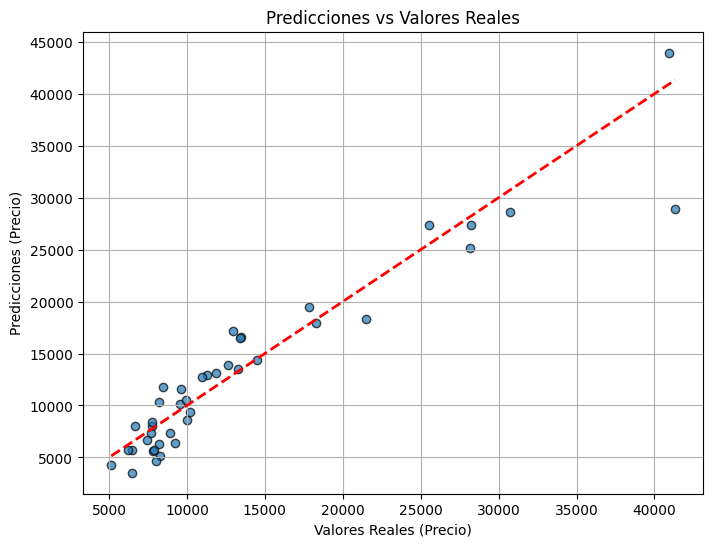

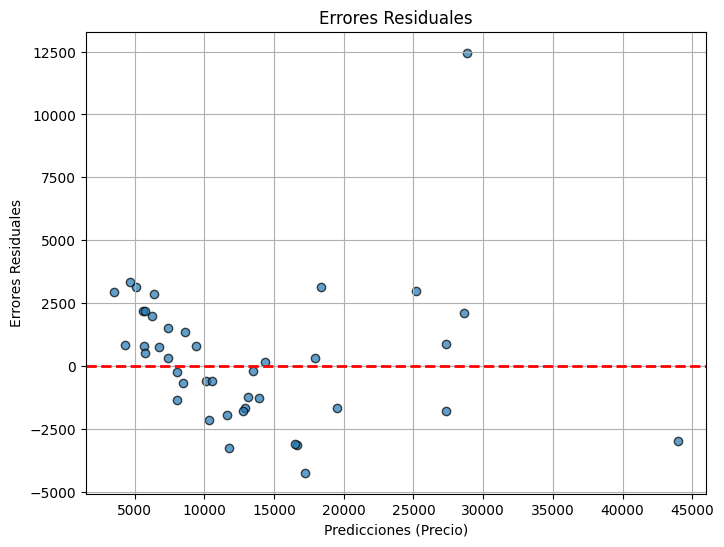

In [10]:
import matplotlib.pyplot as plt

# Gráfica de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, edgecolor='k')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales (Precio)')
plt.ylabel('Predicciones (Precio)')
plt.grid(True)
plt.show()

# Gráfica de los errores residuales
residuals = y_test_reg - y_pred_reg
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_reg, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Errores Residuales')
plt.xlabel('Predicciones (Precio)')
plt.ylabel('Errores Residuales')
plt.grid(True)
plt.show()


1. Gráfico 1:Predicciones vs. Valores Reales:

    - Los puntos cercanos a la línea roja diagonal indican buenas predicciones.
    - Muestra que el modelo predice bastante bien en la mayoría de los casos.

2. Gráfico 2: Errores Residuales:

    - Muestra los errores en las predicciones (diferencia entre valores reales y predichos).
    - La mayoría de los errores están centrados alrededor de 0, lo cual indica un buen ajuste, aunque se observan algunos errores más significativos.

Optimización del modelo. 

In [13]:
# Reimportar todas las bibliotecas necesarias y redefinir las variables para corregir el problema
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Volver a cargar y preparar los datos
file_path = 'ML_cars.csv'
data_cars = pd.read_csv(file_path)

# Preparar las características y la variable objetivo para la regresión
X_regression = data_cars.drop(columns=['price', 'price_category', 'CarName'], errors='ignore')  # Excluir columnas no relevantes
y_regression = data_cars['price']

# Codificar variables categóricas y normalizar
X_regression = pd.get_dummies(X_regression, drop_first=True)
scaler = MinMaxScaler()
X_regression_scaled = pd.DataFrame(scaler.fit_transform(X_regression), columns=X_regression.columns)

# Dividir en conjuntos de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression_scaled, y_regression, test_size=0.2, random_state=42
)

# Configurar un modelo de Random Forest con búsqueda en rejilla
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_forest = RandomForestRegressor(random_state=42)

# Búsqueda en rejilla
grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train_reg, y_train_reg)

# Obtener el mejor modelo y realizar predicciones
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_reg)

# Calcular métricas para el modelo optimizado
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

# Resultados
best_params = grid_search.best_params_
mae_rf, mse_rf, r2_rf, best_params


(1290.2010487804878,
 3361673.89720339,
 0.9574169916892386,
 {'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200})

Explicación del proceso y visualización de los resultados

1. Búsqueda en Rejilla (Grid Search):

    - El proceso evalúa múltiples combinaciones de hiperparámetros para un modelo de Random Forest, buscando la combinación que minimice el error cuadrático medio (MSE) en validación cruzada.
    - Los hiperparámetros ajustados fueron:
        - n_estimators: Número de árboles en el bosque.
        - max_depth: Profundidad máxima del árbol.
        - min_samples_split: Número mínimo de muestras requeridas para dividir un nodo.
        - min_samples_leaf: Número mínimo de muestras en una hoja.
2. Resultados Obtenidos:

    - El mejor modelo fue seleccionado con los hiperparámetros óptimos (best_params).
    - Métricas evaluadas:
        - MAE (Error Absoluto Medio): Promedio de la magnitud de los errores.
        - MSE (Error Cuadrático Medio): Penaliza errores más grandes.
        - R²: Explica la proporción de la variabilidad del precio capturada por el modelo.
Visualizaciones:
1. Predicciones vs. Valores Reales: Para evaluar cómo se alinean las 
2. predicciones del modelo con los precios reales.
3. Errores Residuales: Para analizar cómo se distribuyen los errores.

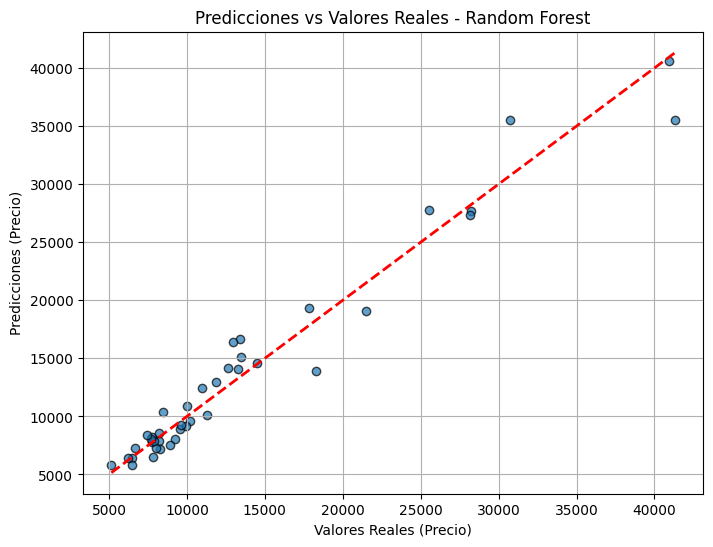

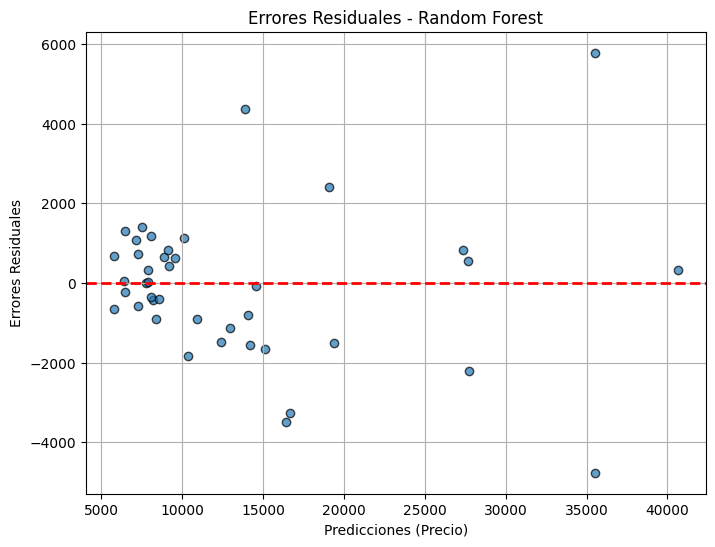

In [14]:
import matplotlib.pyplot as plt

# Gráfica de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_rf, alpha=0.7, edgecolor='k')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales - Random Forest')
plt.xlabel('Valores Reales (Precio)')
plt.ylabel('Predicciones (Precio)')
plt.grid(True)
plt.show()

# Gráfica de los errores residuales
residuals_rf = y_test_reg - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.7, edgecolor='k')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Errores Residuales - Random Forest')
plt.xlabel('Predicciones (Precio)')
plt.ylabel('Errores Residuales')
plt.grid(True)
plt.show()
